Allison Forte

September 23, 2022

DSC 630

#  4.2 Assignment: Clustering Exercise
Using the als_data.csv dataset, apply clustering methods.

1. Remove any data that is not relevant to the patient’s ALS condition.
2. Apply a standard scalar to the data.
3. Create a plot of the cluster silhouette score vs the number of clusters in a K-means cluster.
4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
6. Fit a PCA transformation with two features to the scaled data.
7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.
8. Summarize your results and make a conclusion.

In [1]:
# Load data and libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

df = pd.read_csv('/Users/allison.forte/Downloads/als_data.csv')
print(df.head())
df.describe()

   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [2]:
# Remove any data that is not relevant to the patient’s ALS condition.

columns = list(df.columns.values) # Review columns
print(columns)

['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_ra

In [3]:
df.drop(columns = ['ID', 'SubjectID']) # Drop columns that are not related to ALS condition

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,141.0,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,143.0,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,141.0,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,139.0,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0


In [26]:
# Apply a standard scalar to the data.

object = StandardScaler()
scaled_df = object.fit_transform(df)
scaled_df
new_df = pd.DataFrame(scaled_df)
new_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-1.742767,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,...,2.300470,0.260968,-1.719279,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-1.741331,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,...,-0.278144,-0.489913,-1.718879,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.739896,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,...,1.195350,-0.654169,-1.716861,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,-1.738460,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,...,0.458603,-0.272701,-1.712520,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,-1.737024,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,...,0.458603,-0.722774,-1.710920,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1.728769,-1.891363,0.924415,1.901683,1.326179,-0.523480,0.785569,0.622562,0.813473,1.179597,...,-0.278144,-0.103934,1.718963,0.455695,0.049689,0.867032,-0.775847,0.192665,0.463054,-0.419151
2219,1.730205,0.566074,-0.003443,0.394641,0.386438,-0.491855,0.545755,-0.130304,-0.166601,-0.335275,...,1.563723,-0.638454,1.722106,-0.688950,-0.416383,0.018699,-0.778784,0.632611,-0.337077,-0.419151
2220,1.731641,-0.662644,-0.312730,0.017880,0.073191,-0.174361,0.995908,-1.071386,-0.618943,0.014311,...,-0.646518,-0.202174,1.724611,-0.688950,-0.416383,0.442866,-1.179720,2.338745,0.463054,-0.419151
2221,1.733076,-1.540301,0.615129,0.017880,-0.553303,0.426393,-0.205092,0.434346,0.361131,0.130839,...,-0.278144,-0.846582,1.725076,1.028018,-0.183347,-0.405467,0.794913,-0.880376,-1.137208,-0.419151


In [37]:
y = kmeans.fit_predict(new_df)

new_df('Cluster') == y
print(new_df.head())

TypeError: 'DataFrame' object is not callable

In [23]:
new_df = pd.DataFrame(scaled_data)
new_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-1.742767,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,...,2.300470,0.260968,-1.719279,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-1.741331,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,...,-0.278144,-0.489913,-1.718879,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.739896,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,...,1.195350,-0.654169,-1.716861,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,-1.738460,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,...,0.458603,-0.272701,-1.712520,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,-1.737024,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,...,0.458603,-0.722774,-1.710920,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1.728769,-1.891363,0.924415,1.901683,1.326179,-0.523480,0.785569,0.622562,0.813473,1.179597,...,-0.278144,-0.103934,1.718963,0.455695,0.049689,0.867032,-0.775847,0.192665,0.463054,-0.419151
2219,1.730205,0.566074,-0.003443,0.394641,0.386438,-0.491855,0.545755,-0.130304,-0.166601,-0.335275,...,1.563723,-0.638454,1.722106,-0.688950,-0.416383,0.018699,-0.778784,0.632611,-0.337077,-0.419151
2220,1.731641,-0.662644,-0.312730,0.017880,0.073191,-0.174361,0.995908,-1.071386,-0.618943,0.014311,...,-0.646518,-0.202174,1.724611,-0.688950,-0.416383,0.442866,-1.179720,2.338745,0.463054,-0.419151
2221,1.733076,-1.540301,0.615129,0.017880,-0.553303,0.426393,-0.205092,0.434346,0.361131,0.130839,...,-0.278144,-0.846582,1.725076,1.028018,-0.183347,-0.405467,0.794913,-0.880376,-1.137208,-0.419151


In [19]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(new_df)
 
print(label)

[3 3 5 ... 8 8 2]


In [ ]:
matplotlib.pyplot.scatter(x_axis_data, y_axis_data,

In [20]:
import matplotlib.pyplot as plt
 
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(new_df[label == i , 0] , new_df[label == i , 1] , label = i)
plt.legend()
plt.show()

KeyError: (array([False, False, False, ..., False, False, False]), 0)

NameError: name 'X' is not defined

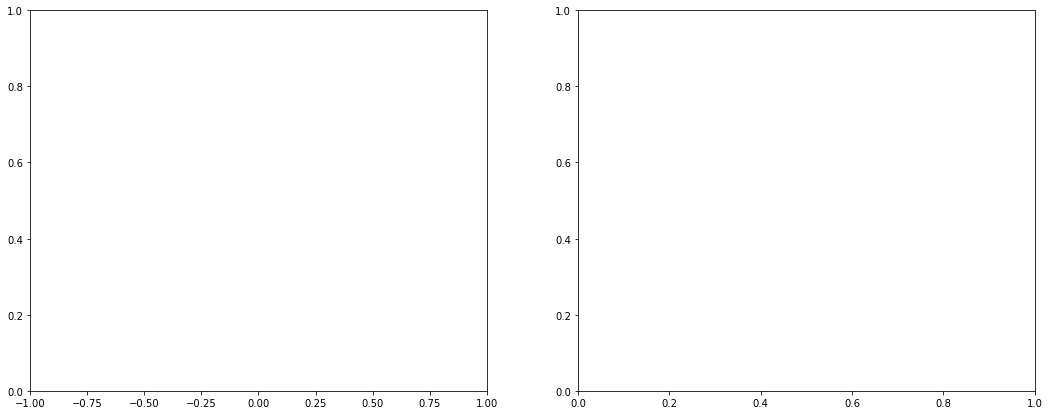

In [11]:
# Plot the cluster silhouette score vs the number of clusters in a K-means cluster

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
6. Fit a PCA transformation with two features to the scaled data.
7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.
8. Summarize your results and make a conclusion.